<a href="https://colab.research.google.com/github/SirajShaikh96/Global-Terrorism-Analysis-/blob/main/Copy_of_Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/data/Global Terrorism Data.csv'

In [ ]:
df = pd.read_csv(file_path, encoding = 'latin-1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
df.rename(columns={'eventid':'event','iyear':'year','imonth':'month','iday':'day','resolution':'resolution','country_txt':'country_txt', 'region_txt':'region_txt','provstate':'state', 'city':'city', 'latitude':'latitude', 'longitude':'longitude',
       'location':'Location','summary':'Summary','attacktype1_txt':'AttackType','target1':'Target','targtype1_txt':'TargetType','gname':'Gruopname','motive':'Motive','weaptype1':'Weapon','nkill':'Kill', 'nwound':'Wound','success':'success'},inplace=True)

In [ ]:
t_df = df[['event','year','month','day','resolution','country_txt','region_txt','state','city','latitude','longitude',
       'Location','Summary','AttackType','Target','TargetType','Gruopname','Motive','Weapon','Kill','Wound','success']]

In [ ]:
t_df.head()

,event,year,month,day,resolution,country_txt,region_txt,state,city,latitude,...,Summary,AttackType,Target,TargetType,Gruopname,Motive,Weapon,Kill,Wound,success
0,197000000001,1970,7,2,NaN,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,...,NaN,Assassination,Julio Guzman,Private Citizens & Property,MANO-D,NaN,13,1.0,0.0,1
1,197000000002,1970,0,0,NaN,Mexico,North America,Federal,Mexico city,19.371887,...,NaN,Hostage Taking (Kidnapping),"Nadine Chaval, daughter",Government (Diplomatic),23rd of September Communist League,NaN,13,0.0,0.0,1
2,197001000001,1970,1,0,NaN,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,...,NaN,Assassination,Employee,Journalists & Media,Unknown,NaN,13,1.0,0.0,1
3,197001000002,1970,1,0,NaN,Greece,Western Europe,Attica,Athens,37.997490,...,NaN,Bombing/Explosion,U.S. Embassy,Government (Diplomatic),Unknown,NaN,6,NaN,NaN,1
4,197001000003,1970,1,0,NaN,Japan,East Asia,Fukouka,Fukouka,33.580412,...,NaN,Facility/Infrastructure Attack,U.S. Consulate,Government (Diplomatic),Unknown,NaN,8,NaN,NaN,1


In [ ]:
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)

%matplotlib inline

1. Extract what are the different attack types terrorist group use to attack.Use line graph to visualize the data.

   Extract Loss of life in particular target types terrorist group attacked. Use bar graph to visualize the data.





   

In [ ]:
no_of_attackType = t_df[~t_df['AttackType'].isna()]
no_of_attackType.loc[:,'AttackType']

attackType_list = []
#iteratingf over attackType, further it will help to now which type of attack happened more.
for i in no_of_attackType.loc[:,'AttackType']:
  attackType_list.append(i)
  

#Total no of attack type 
attackType_set = set(attackType_list)
print(f'There are total {len(attackType_set)} type of attacks.')

There are total 9 type of attacks.


In [ ]:
attackType_df = pd.DataFrame(attackType_list)
attackType_df.value_counts()

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
dtype: int64

Text(0.5, 0, 'Year')

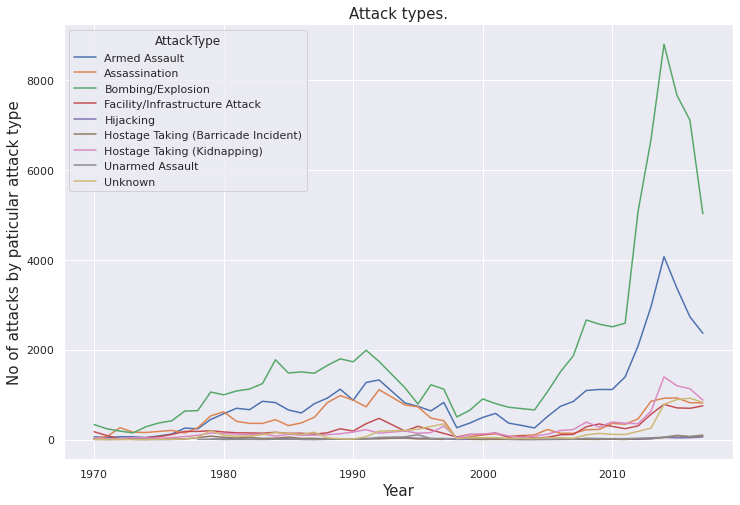

In [ ]:
attacktype_yearly_trend = t_df.groupby(['year','AttackType'])['year'].count().unstack()
plt.rcParams['figure.figsize'] = [12,8]
attacktype_yearly_trend.plot()
plt.title("Attack types.",fontsize=15)
plt.ylabel("No of attacks by paticular attack type",fontsize=15)
plt.xlabel("Year",fontsize=15)

From this graph we can conclude that, Bombing/Explosion's are the highest attack type done by terrorist groups.

In [ ]:
no_na_attck =  t_df[~t_df['AttackType'].isna()]
no_of_kill = t_df[~t_df['Kill'].isna()]
death_per_attacktype = t_df.groupby(['AttackType'])['Kill'].sum()
death_per_attacktype.sort_values(ascending=False)


AttackType
Armed Assault                          160297.0
Bombing/Explosion                      157321.0
Unknown                                 32381.0
Assassination                           24920.0
Hostage Taking (Kidnapping)             24231.0
Hostage Taking (Barricade Incident)      4478.0
Hijacking                                3718.0
Facility/Infrastructure Attack           3642.0
Unarmed Assault                           880.0
Name: Kill, dtype: float64

Text(0.5, 0, 'Attack Type')

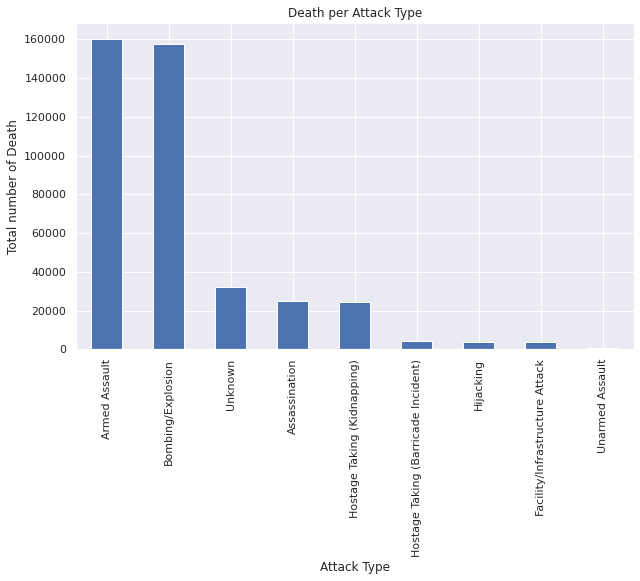

In [ ]:
plt.rcParams['figure.figsize'] = [10,6]
death_per_attacktype.sort_values(ascending=False).plot(kind='bar')

plt.title('Death per Attack Type')
plt.ylabel('Total number of Death')
plt.xlabel('Attack Type')

From this bar graph we can conclude that, Armed Assault and Bombing/Explosion are two attack type happens more, B'coz this two attack type causes most of the casualties and death. Fire explosion and firearms are the two weapon type were used in most of the attacks.






2. Calculate the Total no of affected countries and total no of death's from 1970 to 2017. Use data visualization to visualize top 10 affected countries and no of deth's in those 10 countries.

In [ ]:
#Total affected countries and total no of death's from 1970 to 2017.
No_0f_death_per_country = t_df.groupby(['country_txt'])['Kill'].sum()
No_0f_death_per_country.sort_values(ascending=False)

total_kill = t_df['Kill'].sum()
total_countries = len(t_df['country_txt'].value_counts())
print(f"Total {total_kill} death happened in terror attacks in {total_countries} countries.\n")

#Top 10 affected countries. 
most_affected_countries = t_df.loc[:,'country_txt'].value_counts()




Total 411868.0 death happened in terror attacks in 205 countries.



254099.0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


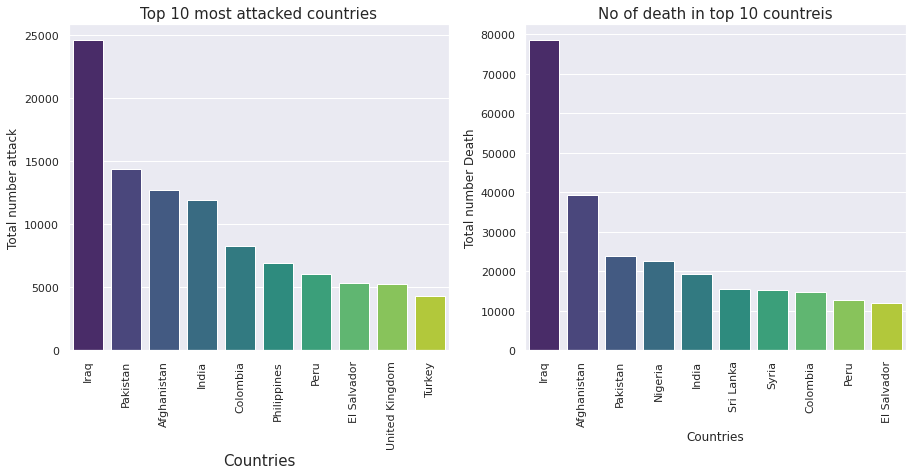

In [ ]:
plt.subplot(1,2,1)
sns.barplot(most_affected_countries[:10].index,most_affected_countries[:10].values,palette='viridis')

plt.title('Top 10 most attacked countries',fontsize=15)
plt.ylabel('Total number attack')
plt.xlabel('Countries',fontsize=15)
plt.xticks(rotation=90)
plt.gcf().set_size_inches(15,6)



plt.subplot(1,2,2)
sns.barplot(No_0f_death_per_country.sort_values(ascending=False)[:10].index,No_0f_death_per_country.sort_values(ascending=False)[:10].values,palette='viridis')

plt.title('No of death in top 10 countreis',fontsize=15)
plt.ylabel('Total number Death')
plt.xlabel('Countries')
plt.xticks(rotation=90)
plt.gcf().set_size_inches(15,6)

**Total 99852 attacks happened in this top 10 countries, which is around 55% of the total attacks happened in 205 countries. And total 254099 people were killed, which around 61.6% of the total death's happened in all 205 affected countries**

# From this graph we can conclude the Iraq is the most affected in terms of attack and death's.





3. Use Data Visualization to visual the targets of terrorist groups.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

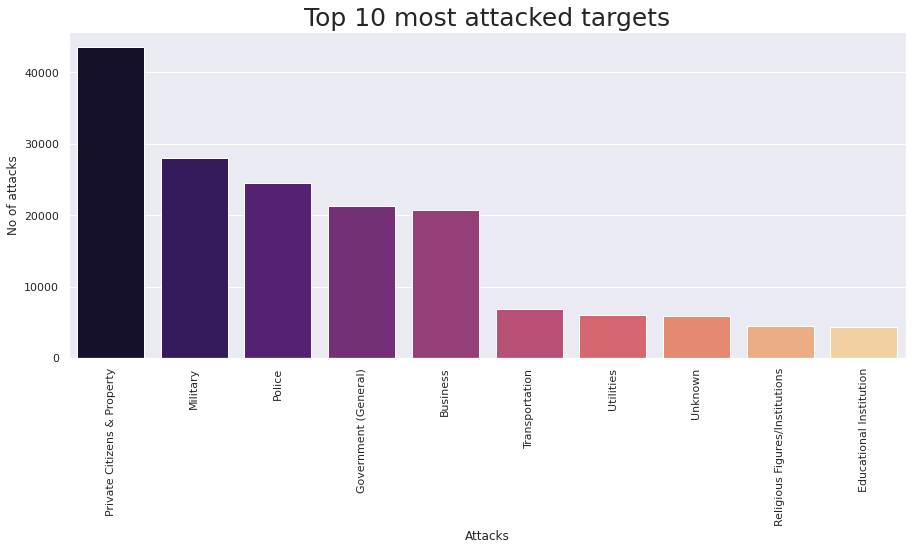

In [ ]:
attacked_targets = t_df['TargetType'].value_counts()

plt.figure(figsize=(15,6))
sns.barplot(attacked_targets.sort_values(ascending=False)[:10].index,attacked_targets.sort_values(ascending=False)[:10].values,palette='magma')

plt.title('Top 10 most attacked targets',fontsize=25)
plt.ylabel('No of attacks')
plt.xlabel('Attacks')
plt.xticks(rotation=90)

**we can conclude that citizens and private properties, and military personnel are the most attacked Targets in every terror attacks**.




# 4. Use Data visualization to visaulize the no of attacks from 1970 to 2017.
#   Also extract no of successful and unsuccessful attacks till 2017.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 <a list of 47 Text major ticklabel objects>)

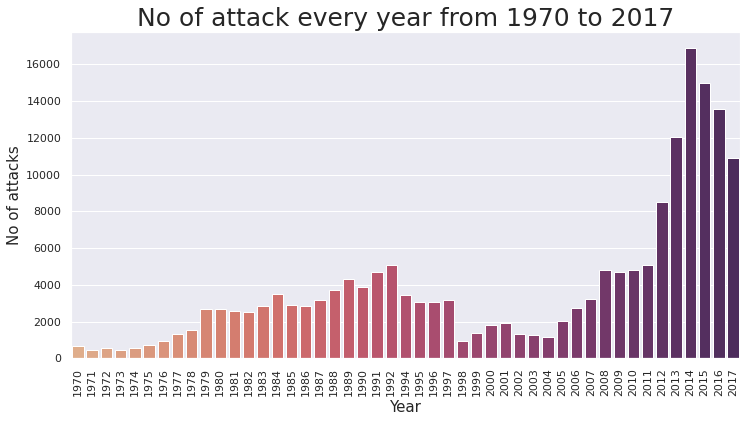

In [ ]:
no_of_attacks_every_year = t_df['year'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12,6))

sns.barplot(no_of_attacks_every_year.index,no_of_attacks_every_year.values,palette='flare')

plt.title('No of attack every year from 1970 to 2017',fontsize=25)
plt.ylabel('No of attacks',fontsize=15)
plt.xlabel('Year',fontsize=15)
plt.xticks(rotation=90)






**From this bar graph we can conclude that 2014, 2015 and 2016 are the three years in which terrorist attacks where highest. And total 181691 attacks were happened fro 1970 to 2017.**

# Use countplot feature to visualize the trend of successfull & unsuccessfull terror attacks.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 <a list of 47 Text major ticklabel objects>)

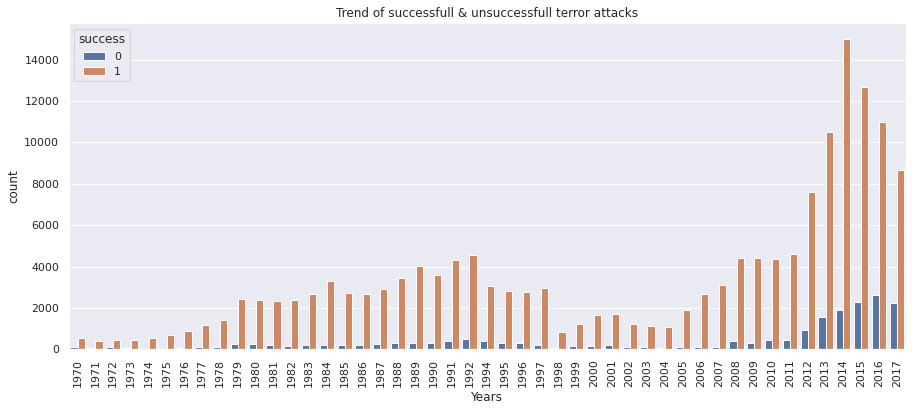

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x='year',hue='success',data=t_df)
plt.title('Trend of successfull & unsuccessfull terror attacks')
plt.xlabel('Years')
plt.xticks(rotation=90)

In [ ]:
t_df['success'].value_counts()
print(f"Out of 181691 attacks {t_df['success'].value_counts().max()} were successfull and {t_df['success'].value_counts().min()} were unsuccessfull")
percent_wise_data = ((t_df['success'].value_counts().max()-t_df['success'].value_counts().min())/t_df['success'].value_counts().max())*100
print(f"{percent_wise_data} % attacks were successfull")

Out of 181691 attacks 161632 were successfull and 20059 were unsuccessfull
87.58970995842408 % attacks were successfull



**From above graph we conclude that total 181691 attacks were happened out of which 161632 were successfull and 20059 were unsuccessfull, around
87.58 % attacks were successfull.**



#5. Calculate total no of death in terror attacks from 1970 to 2017.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 <a list of 47 Text major ticklabel objects>)

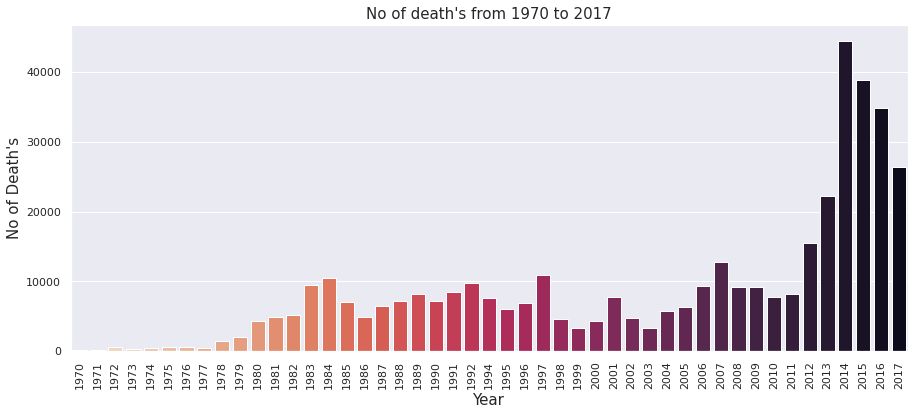

In [ ]:
most_terrifying_years = t_df.groupby(['year'])['Kill'].sum().sort_values(ascending=False)

plt.figure(figsize=(15,6))
sns.barplot(most_terrifying_years.index,most_terrifying_years,palette='rocket_r')

plt.title("No of death's from 1970 to 2017",fontsize=15)
plt.ylabel("No of Death's",fontsize=15)
plt.xlabel('Year',fontsize=15)
plt.xticks(rotation=90)

**From this we can conclude that total 411868 death's were happened in terror attacks in 205 countrie from 1970 to 2017. Highest affected year by terror attacks is year 2014.**
 

#6. Let's find which top 10 country and region were attack by terrorist groups, and no of death's in those countries and region's in year 2014.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


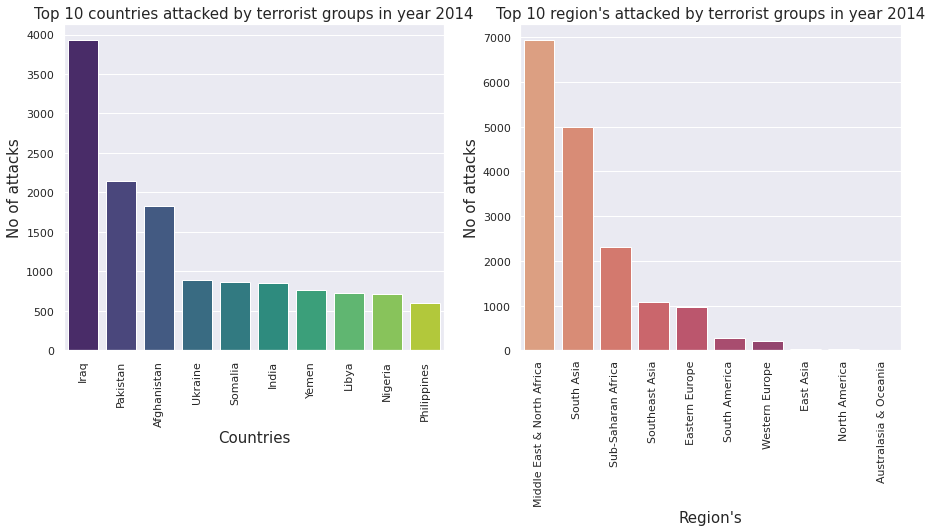

In [ ]:
most_terr_year= t_df[t_df.year== 2014]
sorted_most_terr_year = most_terr_year['country_txt'].value_counts().sort_values(ascending=False)[:10]

plt.subplot(1,2,1)
sns.barplot(sorted_most_terr_year.index,sorted_most_terr_year,palette='viridis')

plt.title("Top 10 countries attacked by terrorist groups in year 2014",fontsize=15)
plt.ylabel("No of attacks",fontsize=15)
plt.xlabel('Countries',fontsize=15)
plt.xticks(rotation=90)
plt.gcf().set_size_inches(15,6)

sorted_most_terr_year_region = most_terr_year['region_txt'].value_counts().sort_values(ascending=False)[:10]

plt.subplot(1,2,2)
sns.barplot(sorted_most_terr_year_region.index,sorted_most_terr_year_region,palette='flare')

plt.title("Top 10 region's attacked by terrorist groups in year 2014",fontsize=15)
plt.ylabel("No of attacks",fontsize=15)
plt.xlabel("Region's",fontsize=15)
plt.xticks(rotation=90)
plt.gcf().set_size_inches(15,6)

**In peak year 2014 most attacked country is Iraq and most attacked region is Middle East and North Africa.Total 16903 attacks were happened in year 2014 out which 13337 (79%) attacks were happened in this top 10 countries and around 16889(99.9%) attacks happened in top 10 region. 6939(41%) attacks happened Middle East and North Africa.**

#Calculate total no of death's and wounded people in top 10 affected countries in year 2014.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



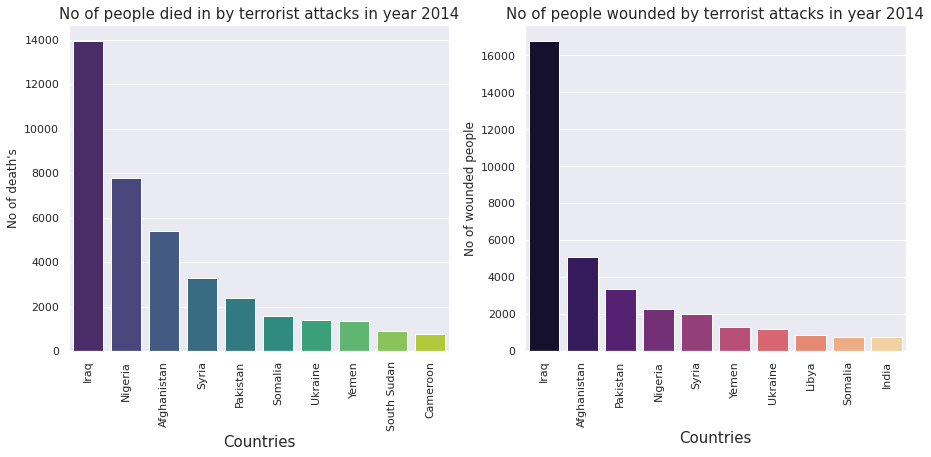

In [ ]:
most_terr_kill= t_df[t_df.year== 2014]
sorted_most_kill_year = most_terr_kill.groupby(['country_txt'])['Kill'].sum().sort_values(ascending=False)[:10]

plt.subplot(1,2,1)
sns.barplot(sorted_most_kill_year.index,sorted_most_kill_year,palette='viridis')

plt.title("No of people died in by terrorist attacks in year 2014",fontsize=15)
plt.ylabel("No of death's")
plt.xlabel('Countries',fontsize=15)
plt.xticks(rotation=90)
plt.gcf().set_size_inches(15,6)

sorted_most_Wound_year = most_terr_kill.groupby(['country_txt'])['Wound'].sum().sort_values(ascending=False)[:10]

plt.subplot(1,2,2)
sns.barplot(sorted_most_Wound_year.index,sorted_most_Wound_year,palette='magma')

plt.title("No of people wounded by terrorist attacks in year 2014",fontsize=15)
plt.ylabel("No of wounded people",)
plt.xlabel('Countries',fontsize=15)
plt.xticks(rotation=90)
plt.gcf().set_size_inches(15,6)

**In year 2014 total 34582 people were died and total 34582 people got wounded in terror attack.**






#7. Find out top 10 Terrorist groups, who has done most of the terrorist attacks.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


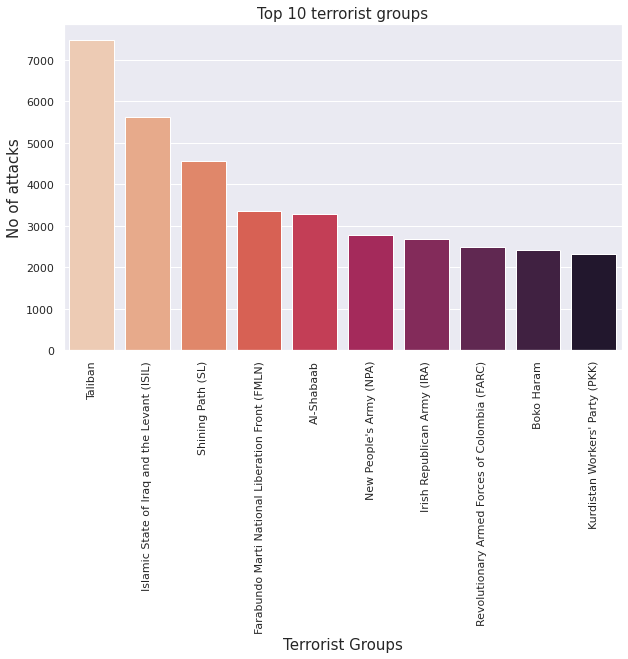

In [ ]:
terrorist_groups = t_df['Gruopname'].value_counts().sort_values(ascending=False)
terrorist_groups
plt.figure(figsize=(10,6))
sns.barplot(terrorist_groups[1:11].index,terrorist_groups[1:11],palette='rocket_r')

plt.title("Top 10 terrorist groups",fontsize=15)
plt.ylabel("No of attacks",fontsize=15)
plt.xlabel('Terrorist Groups',fontsize=15)
plt.xticks(rotation=90)
plt.show()

**From this bar graph we can conclude that Taliban is the terrorist group who has done highest no of attack's.**




#8. Use data visaulization to visaulize most attacked countries by taliban.

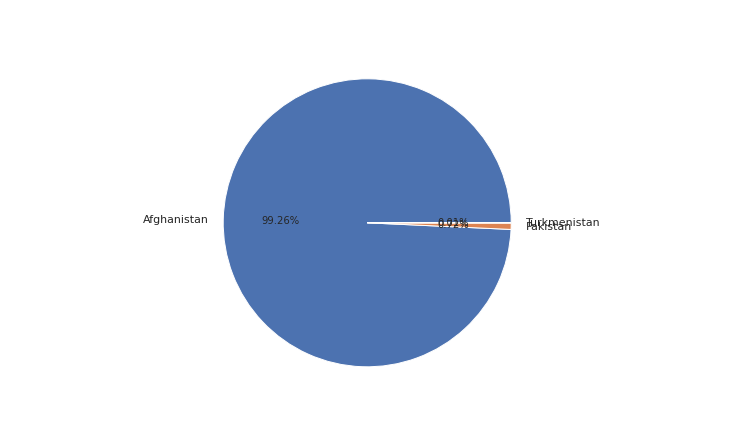

In [ ]:
talibani = t_df[t_df.Gruopname== 'Taliban']

terr_of_taliban_country = talibani['country_txt'].value_counts().rename_axis('country_txt').reset_index(name='no_of_attacks')

terr_of_taliban_country = pd.DataFrame(terr_of_taliban_country)
k_lbl = terr_of_taliban_country.no_of_attacks
c_lbl = terr_of_taliban_country.country_txt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')


ax.pie(k_lbl, labels = c_lbl, autopct = '%1.2f%%',radius=0.5)
plt.show()

**From this pie chart we can conclude that Talibani's mostly attacked 
afghanistan, almost 99.26% Talibani's attack happened in afghanistan.**




#9. Extract the data of total no of terror attacks by taliban and total people killed by taliban.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


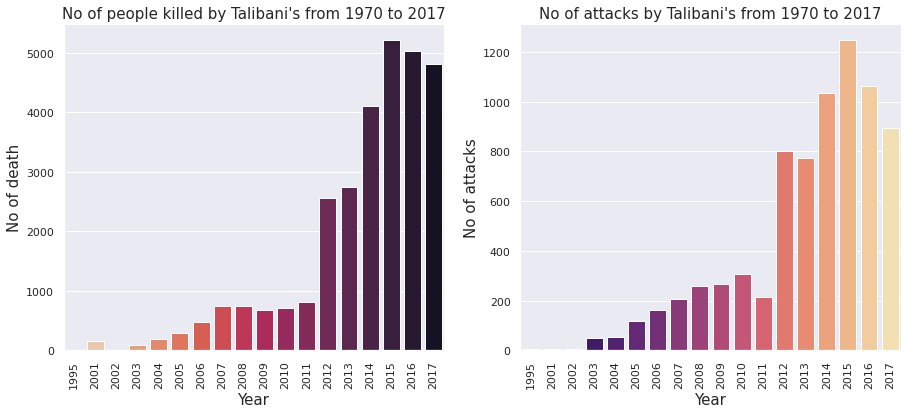

In [ ]:
terr_of_taliban_Kill = talibani.groupby(['year'])['Kill'].sum()
plt.subplot(1,2,1)
sns.barplot(terr_of_taliban_Kill.index,terr_of_taliban_Kill,palette='rocket_r')

plt.title("No of people killed by Talibani's from 1970 to 2017",fontsize=15)
plt.ylabel("No of death",fontsize=15)
plt.xlabel('Year',fontsize=15)
plt.xticks(rotation=90)
plt.gcf().set_size_inches(15,6)

terr_of_taliban = talibani['year'].value_counts()
plt.subplot(1,2,2)
sns.barplot(terr_of_taliban.index,terr_of_taliban,palette='magma')

plt.title("No of attacks by Talibani's from 1970 to 2017",fontsize=15)
plt.ylabel("No of attacks",fontsize=15)
plt.xlabel('Year',fontsize=15)
plt.xticks(rotation=90)
plt.gcf().set_size_inches(15,6)

**Total 29410 people were killed by Talibani's in 7478 attacks.**





#10. Use map to visaulize the no of attacks in each country.

In [ ]:
import plotly.express as px

attack_country = t_df.groupby(['country_txt'],as_index=False).count()

In [ ]:
fig= px.choropleth(attack_country,locations='country_txt',locationmode='country names',
                   color = 'year', hover_name='country_txt',projection='orthographic',
                   title='Total no of attacks from 1970 to 2017',labels={'year':'Attacks'})

fig.show()

**Conclusion:**
**1. Most affected country by terror attacks is Iraq  and most affected region by terror attacks is Middle East and North Africa.**

**2. Taliban, Islamic State of Iraq and the Levant (ISIL), Shining Pa(SL)        , Farabundo Marti National Liberation Front (FMLN), Al-Shabaab, New People's Army (NPA), Irish Republican Army (IRA), Revolutionary Armed Forces of Colombia (FARC), Boko Haram, Kurdistan Workers Party (PKK) are top 10 terrorist organization.**

**3. Taliban has done most of the attacked among top 10 terrorist organization.  Afghanistan, Pakistan and Turkmenistan are 3 countries attaked by taliban. Taliban killed total 29410 people in 7478 attacks.**

**4. Highest terror attack happened year 2014.**

**5. No of death is highest by Armed Assault and Bombing/Explosion. Around 160297 death were happened by Armed Assault, 157321 death were happened by Bombing/Explosion.**

**6. Citizens & Private  Property is the most attacked target by terrorist groups.Around 43511 attacks were happened on Citizens & Private Property.**

**7. From 1970 to 2017, 181691 attacks were happened out of which 161632 were successfull and 20059 were unsuccessfull. 87.58970995842408 % of terror attacks were successfull. 411868 people were died and 523869 people were wounded in terrorist attacks till 2017.**
